This program attempts to predict Microsoft Corp stock for a specific day by importing histroical MSFT stock data and using Machine Learning algorithm called Support Vector Regression (SVR) & Linear Regression (LR) models.

This project was a a patchwork from several sources online from places like Kaggle where I sourced the Data and https://www.youtube.com/watch?v=AF8zgxLukg4 who had a great video on predicting Facebook & Google Stock.
I also watch other videos in order to gain a better understanding of machine learning.

# Main

In [0]:
# Importing Packages & Dependancies
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import datetime



# Machine Learning - Predicting Stock

In [0]:
# Uploading & Importing the MSFT Stock data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('MSFT.csv')
df.head (7)

Saving MSFT.csv to MSFT.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,161.149994,163.380005,160.199997,162.279999,161.837952,32078100
1,2020-01-28,163.779999,165.759995,163.070007,165.460007,165.009308,24899900
2,2020-01-29,167.839996,168.750000,165.690002,168.039993,167.582260,34754500
3,2020-01-30,174.050003,174.050003,170.789993,172.779999,172.309357,51597500
4,2020-01-31,172.210007,172.399994,169.580002,170.229996,169.766296,36142700
5,2020-02-03,170.429993,174.500000,170.399994,174.380005,173.904999,30149100
6,2020-02-04,177.139999,180.639999,176.309998,180.119995,179.629364,36433300


In [0]:
#Creates two lists called dates and prices
dates = []
prices = []

In [0]:
#Counts number of rows and columns within the dataset and prints
df.shape

(20, 7)

In [0]:
#Prints the last row and column within the dataset
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
19,2020-02-24,167.770004,174.550003,163.229996,170.889999,170.889999,68311100


In [0]:
#Creates a new dataset that includes all but the last row
df = df.head(len(df)-1)

In [0]:
#Counts and prints the number of rows and columns within the dataset
df.shape

(19, 7)

In [0]:
#Gets all of the roads from the dates & open cloumn
df_dates = df.loc[:, 'Date']
df_open = df.loc[:, 'Open']

In [0]:
#Creates an dataset for dates and open prices
for date in df_dates:
  dates.append( [int(date.split('-')[2])])

for open_price in df_open:
  prices.append(float(open_price))

In [0]:
#Prints the dates that was recorded
print(prices)

[161.149994, 163.779999, 167.83999599999999, 174.050003, 172.21000700000002, 170.429993, 177.139999, 184.029999, 180.970001, 182.850006, 183.580002, 190.649994, 185.580002, 183.080002, 183.25, 185.610001, 188.059998, 186.949997, 183.169998]


In [0]:
print(dates)

[[27], [28], [29], [30], [31], [3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [18], [19], [20], [21]]


In [0]:
def predict_prices(dates, prices, x):

  #Creates 3 SVR models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3)
  svr_rbf = SVR(kernel='rbf', C=1e3)

  #Trains the SVR models
  svr_lin.fit(dates, prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)

  #Creates & Trains the Linear Regression Model
  lin_reg = LinearRegression()
  lin_reg.fit(dates, prices)

  #Plots all models and data onto a graph
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR POLY')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR LINEAR')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='LINEAR REG')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()

  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0], lin_reg.predict(x)[0]

In [0]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,161.149994,163.380005,160.199997,162.279999,161.837952,32078100
1,2020-01-28,163.779999,165.759995,163.070007,165.460007,165.009308,24899900
2,2020-01-29,167.839996,168.750000,165.690002,168.039993,167.582260,34754500
3,2020-01-30,174.050003,174.050003,170.789993,172.779999,172.309357,51597500
4,2020-01-31,172.210007,172.399994,169.580002,170.229996,169.766296,36142700
5,2020-02-03,170.429993,174.500000,170.399994,174.380005,173.904999,30149100
6,2020-02-04,177.139999,180.639999,176.309998,180.119995,179.629364,36433300
7,2020-02-05,184.029999,184.199997,178.410004,179.899994,179.409958,39186300
8,2020-02-06,180.970001,183.820007,180.059998,183.630005,183.129807,27751400
9,2020-02-07,182.850006,185.630005,182.479996,183.889999,183.389099,33529100


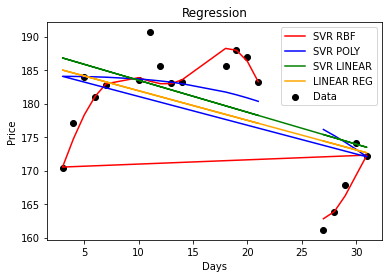

(183.3633031104008, 183.00350205018225, 183.54347672712686, 181.47644342052203)


In [0]:
predicted_price = predict_prices(dates, prices, [[11]])
print(predicted_price)

# MSFT Moving Average

In [0]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)
df = web.DataReader("MSFT", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,156.951309
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,158.237793
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,158.527008
2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,157.160736
2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,157.270432


In [0]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

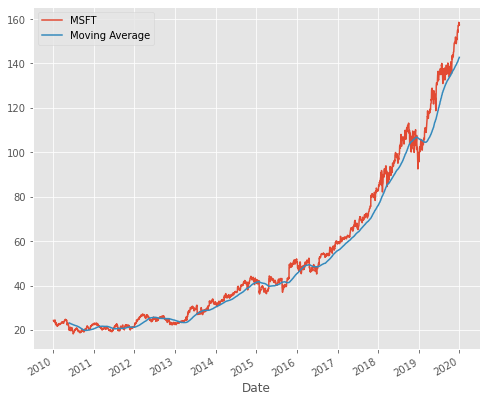

In [0]:
# Adjusting the size of matplotlib
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='MSFT')
mavg.plot(label='Moving Average')
plt.legend()